In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [122]:
df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")

C:\Users\stefa\AppData\Local\Temp\ipykernel_23164\4242051981.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")


In [123]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [124]:
df.shape

(500000, 84)

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [127]:
df2 = df.copy()

In [128]:
columnas_originales=df.columns.to_list()

In [129]:
df2 = df.dropna(axis=1,thresh=df.shape[0]*0.9) # elimina columnas con un mínimo del 90% de info. se quedan en 75column

columnas_despues_eliminar = df2.columns.tolist()
columnas_despues_eliminar = list (set(columnas_originales)- set (columnas_despues_eliminar))
columnas_despues_eliminar


['SmartScreen',
 'Census_ProcessorClass',
 'PuaMode',
 'Census_IsWIMBootEnabled',
 'Census_IsFlightingInternal',
 'OrganizationIdentifier',
 'Census_ThresholdOptIn',
 'DefaultBrowsersIdentifier',
 'Census_InternalBatteryType']

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 75 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [131]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [132]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 74 entries, MachineIdentifier to HasDetections
dtypes: float64(31), int64(17), object(26)
memory usage: 282.3+ MB


In [133]:

tipos = df2.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


object: 26
int64: 17
float64: 31


In [134]:
TARGET = 'HasDetections'

In [135]:
df2[TARGET].mean()

0.499906

In [136]:
df2[TARGET].value_counts(normalize= True)*100

0    50.0094
1    49.9906
Name: HasDetections, dtype: float64

In [137]:
lista_eliminar = ["AutoSampleOptIn", "OsBuildLab", "CityIdentifier","GeoNameIdentifier" ,"Census_InternalBatteryNumberOfCharges", "IsBeta", "Census_InternalPrimaryDisplayResolutionHorizontal", "Census_InternalPrimaryDisplayResolutionVertical" ]
#columnas a eliminar por no aportar información relevante al DF o que ya la tengo en otras columnas

In [138]:
df3 = df2.drop(lista_eliminar, axis = 1)

In [139]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 66 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   AVProductStatesIdentifier                          498062 non-null  float64
 8   AVProductsInstalled                                498062 non-null  float6

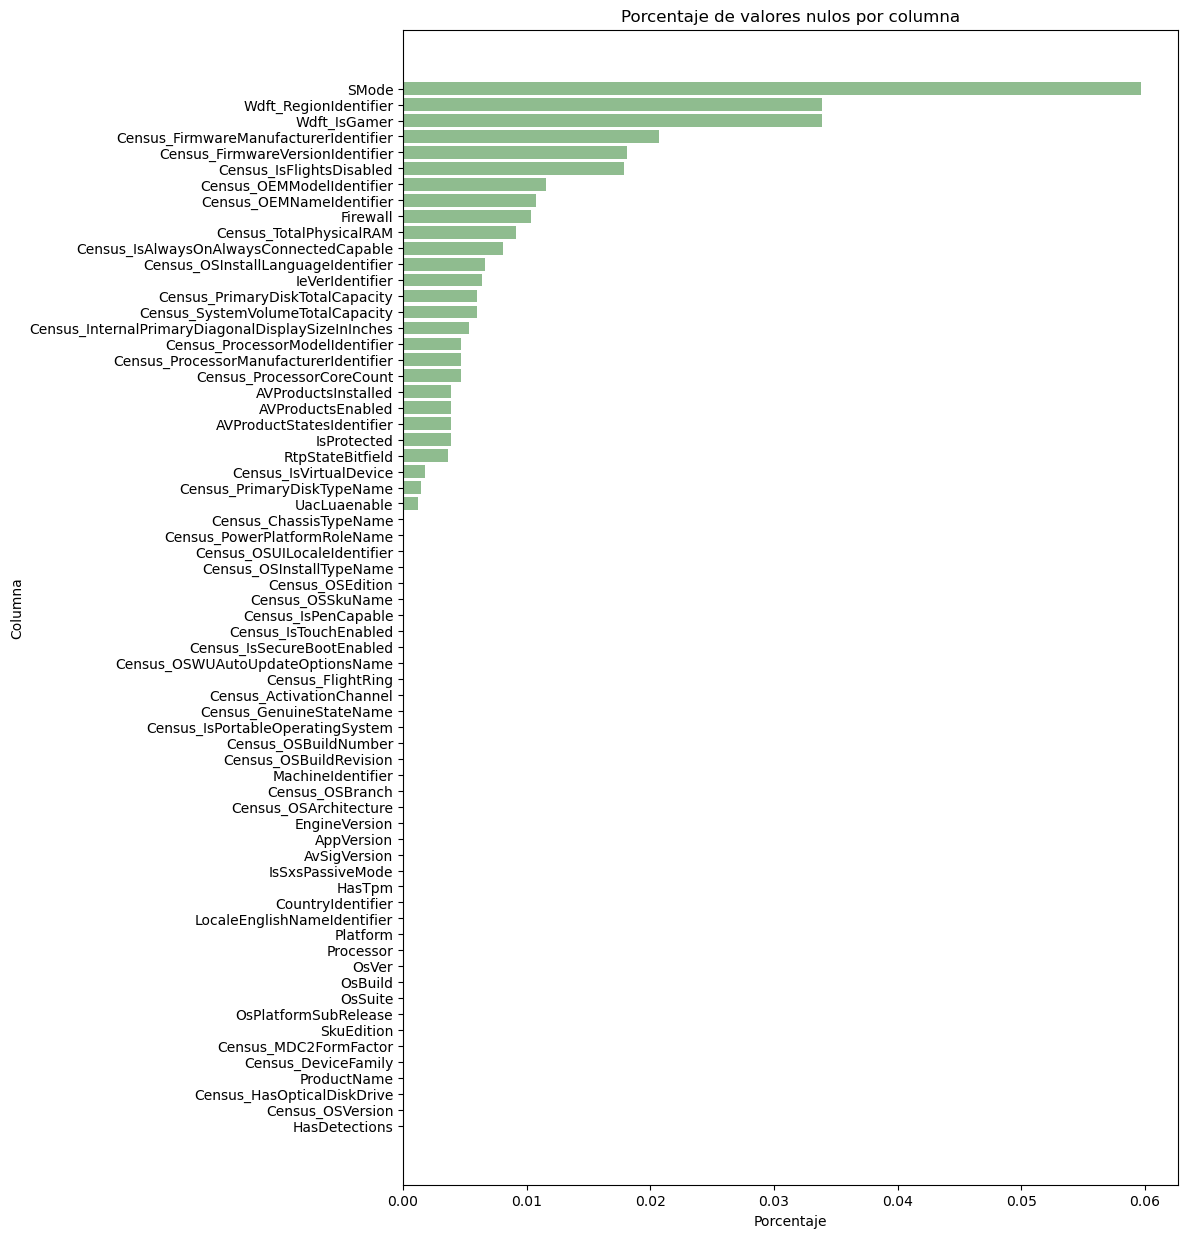

In [140]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df3.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='darkseagreen')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


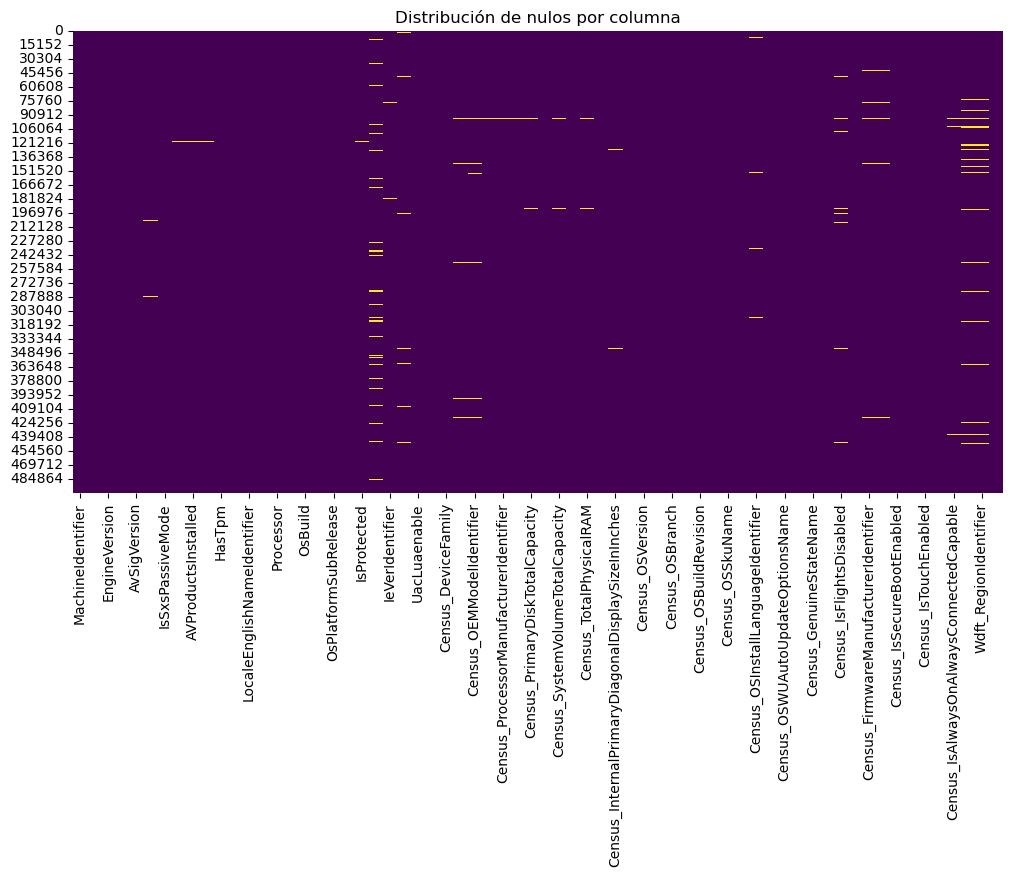

In [141]:
# Distribución de nulos 
plt.figure(figsize=(12, 6))
sns.heatmap(df3.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

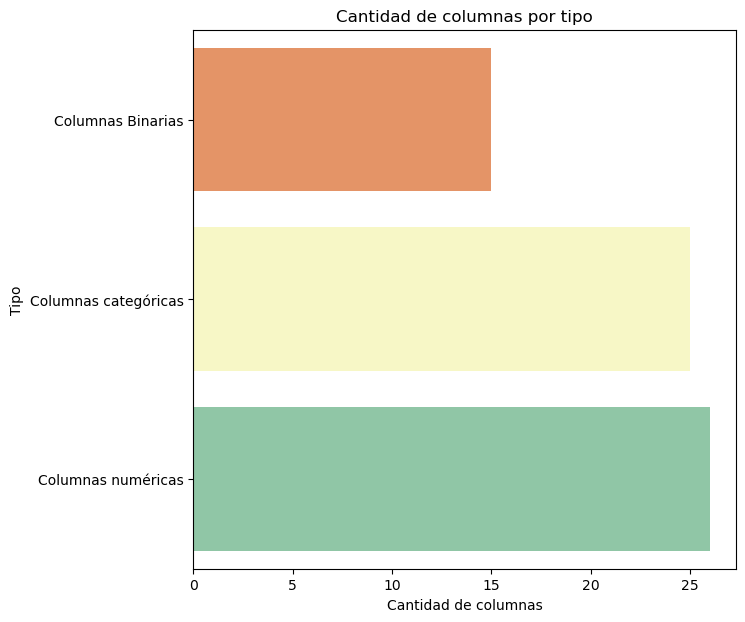

In [142]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df3.columns, 'Número de registros': df3.count(), 'Total': len(df3)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df3.columns, 'Cardinality': df3.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df3.columns if df3[col].nunique() == 2]
true_numerical_columns = [col for col in df3.columns if pd.api.types.is_numeric_dtype(df3[col]) and col not in binary_columns]
categorical_columns = [col for col in df3.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



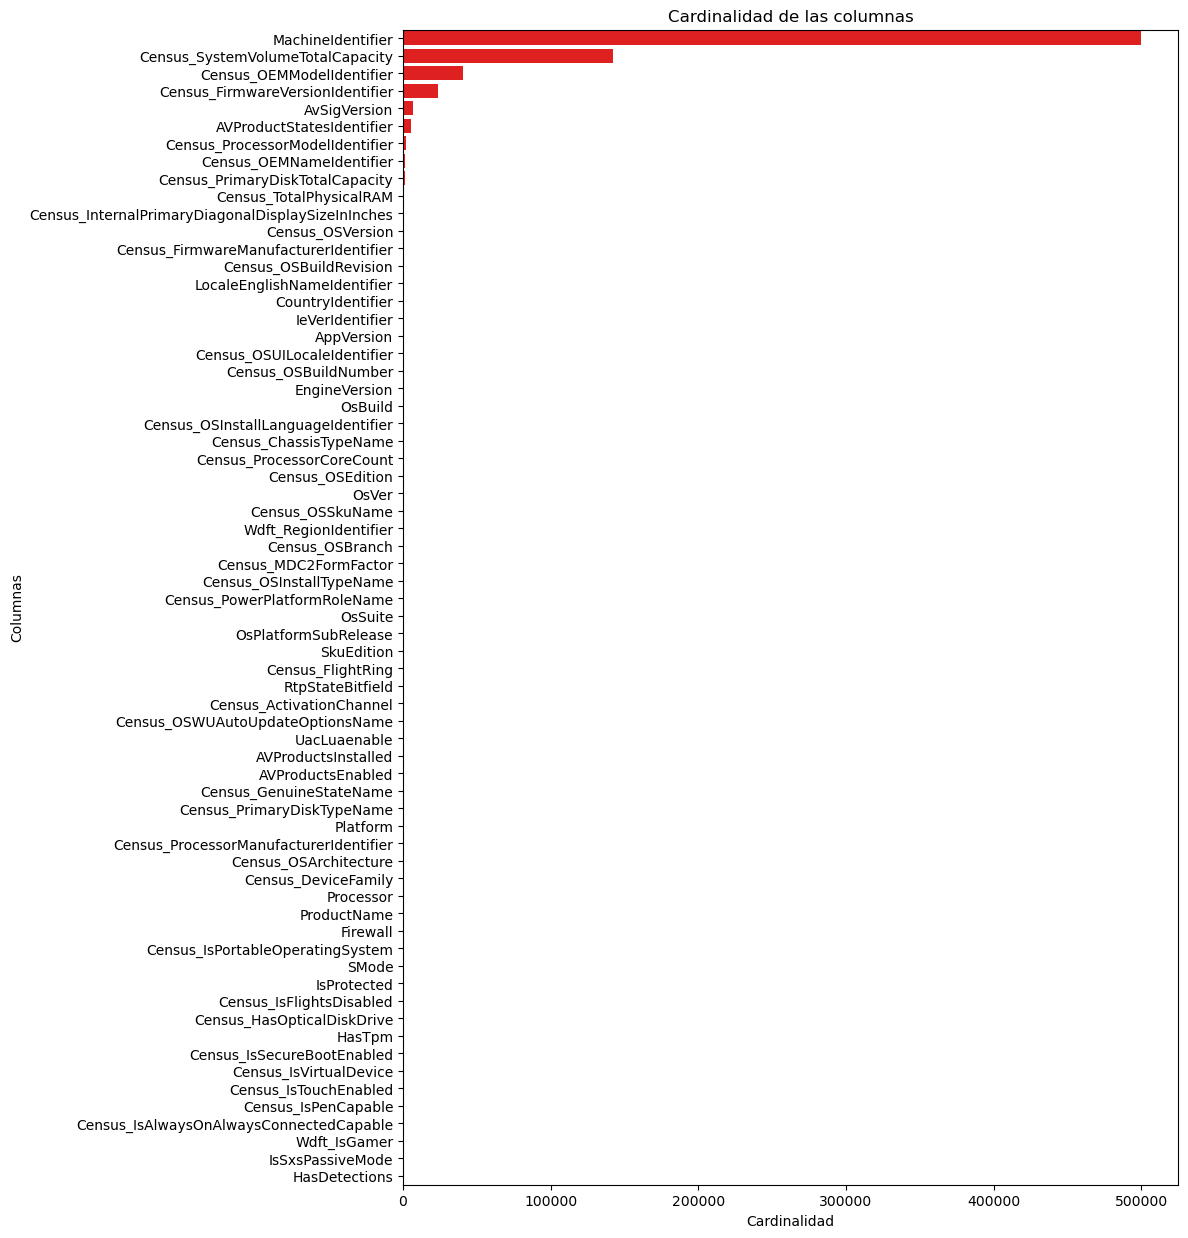

In [143]:
# Calcular la cardinalidad de cada columna
cardinalidad = df3.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad, color='red')

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [144]:
#true_numerical_columns = df2.select_dtypes(include=['number']).columns

# Distribución de valores por columna
#for col in true_numerical_columns:
    #plt.figure(figsize=(5, 4))
    #sns.displot(df2[col], kind="kde")
    #plt.title(f"Distribución de {col}")
    #plt.show()

In [145]:
# Detectar filas duplicadas
duplicados = df3.duplicated()

# Mostrar las filas duplicadas
df3[duplicados]


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections


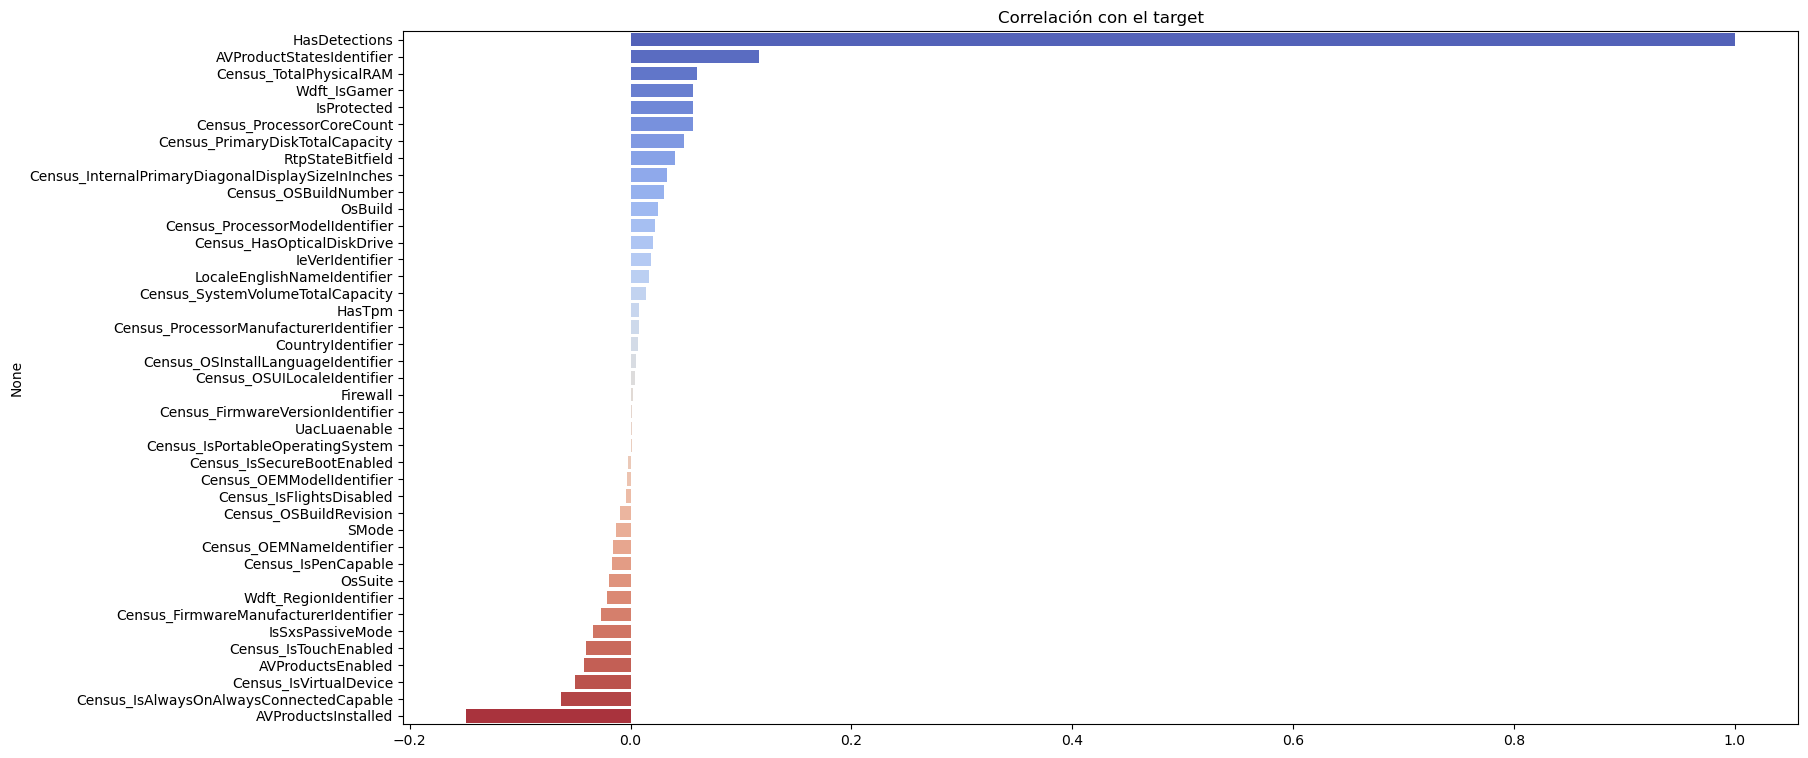

In [146]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df3.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [147]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [148]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df3)


In [149]:
lista_boolean

['IsSxsPassiveMode',
 'HasTpm',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [150]:
# Punto de control
df4 = df3.copy()

In [151]:
# Generar un boxplot para cada columna booleana
""" for columna in lista_boolean:
  sns.boxplot(x=columna, y='HasDetections', data=df2)
  plt.title(f'Distribución de {columna} en relación con HasDetections')
  plt.show()
"""

" for columna in lista_boolean:\n  sns.boxplot(x=columna, y='HasDetections', data=df2)\n  plt.title(f'Distribución de {columna} en relación con HasDetections')\n  plt.show()\n"

In [152]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 66 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   AVProductStatesIdentifier                          498062 non-null  float64
 8   AVProductsInstalled                                498062 non-null  float6

### Limpieza

In [153]:
df4.head(2)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,0,53447.0,1.0,1.0,...,355.0,19951.0,0,0.0,0,0,0.0,0.0,11.0,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,0,53447.0,1.0,1.0,...,486.0,48753.0,0,0.0,0,0,0.0,1.0,3.0,0


In [154]:
def convertir_columnas_boolean(df, columnas_boolean):
    """Convierte las columnas especificadas a tipo booleano en un DataFrame."""
    for columna in columnas_boolean:
        df4[columna] = df4[columna].astype(bool)

# Lista de columnas booleanas obtenida de la función get_var_list
lista_boolean = get_var_list(df4)[1]  # Extraemos la lista booleana del resultado

# Convertir las columnas booleanas a tipo bool
convertir_columnas_boolean(df4, lista_boolean)


In [155]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 66 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  bool   
 7   AVProductStatesIdentifier                          498062 non-null  float64
 8   AVProductsInstalled                                498062 non-null  float6

In [156]:
df4= df4.reset_index()

In [157]:
lista_boolean

['IsSxsPassiveMode',
 'HasTpm',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [158]:
lista_numericas

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

In [159]:
lista_categoricas

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [160]:
columns_to_kill = ['AutoSampleOptIn',
'ProductName',
'Census_InternalBatteryNumberOfCharges',
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
'Census_ProcessorClass',
'Census_ThresholdOptIn',
'DefaultBrowsersIdentifier',
'IsBeta',
'PuaMode',
'UacLuaenable',
'Unnamed: 0']

In [161]:
columns_to_drop = [col for col in columns_to_kill if col in df4.columns]
df4 = df4.drop(columns = columns_to_drop)

In [162]:
df4.head()

,index,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,f1cd864e97bae82bdf96523e1a539121,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,False,53447.0,1.0,1.0,...,355.0,19951.0,False,0.0,False,False,0.0,0.0,11.0,1
1,1,fd5ba6f5b75325ec0423a6c67cc75942,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,False,53447.0,1.0,1.0,...,486.0,48753.0,False,0.0,False,False,0.0,1.0,3.0,0
2,2,4e628391e7cc7c482fb3286f486dbd25,1.1.15100.1,4.9.10586.1106,1.273.781.0,7.0,False,46781.0,2.0,1.0,...,554.0,33111.0,True,0.0,True,True,0.0,0.0,15.0,0
3,3,270a2e9d028144a4df12a9e3da79fba5,1.1.15200.1,4.18.1807.18075,1.275.1639.0,7.0,False,53447.0,1.0,1.0,...,142.0,48473.0,True,0.0,False,False,0.0,0.0,15.0,1
4,4,06ca8fa8d32c2abdc5b3577d676b3269,1.1.15200.1,4.18.1807.18075,1.275.511.0,7.0,False,47238.0,2.0,1.0,...,355.0,4343.0,True,0.0,True,False,0.0,1.0,13.0,1


In [163]:
df4["EngineVersion"].value_counts().sort_values(ascending = False)

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.13902.0         4
1.1.13802.0         4
1.1.12804.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0         3
1.1.14001.

In [164]:
df4.isnull().sum()

index                                          0
MachineIdentifier                              0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
                                           ...  
Census_IsPenCapable                            0
Census_IsAlwaysOnAlwaysConnectedCapable     4040
Wdft_IsGamer                               16950
Wdft_RegionIdentifier                      16950
HasDetections                                  0
Length: 64, dtype: int64

In [165]:
#Lista de columnas para OneHotEncoder
columns_to_ohe = ['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 

# Lista de columnas para Frequency Encoding
columns_to_frequency = [
 'RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

columns_to_most_frequency = ['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [166]:


# Lista de columnas para aplicar set_to_minus_one
columns_to_minus_one = ["AVProductsInstalled", "AVProductsEnabled", "SMode", "Firewall", "Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Wdft_IsGamer"]

# Lista de columnas para aplicar set_to_majority
columns_to_majority = ["IsProtected", "Census_IsVirtualDevice", "Census_IsAlwaysOnAlwaysConnectedCapable"]

# Lista de columnas para aplicar group_by_frequency
columns_to_group_frequency = ["AVProductStatesIdentifier", "IeVerIdentifier", "Census_ProcessorManufacturerIdentifier", "Census_OEMNameIdentifier", "Census_OEMModelIdentifier", "Census_ProcessorCoreCount", "Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM"]

# Lista de columnas para aplicar set_and_group_others
columns_to_group_others = ["Census_FirmwareManufacturerIdentifier", "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Census_TotalPhysicalRAM", "Census_PrimaryDiskTotalCapacity", "Census_ProcessorCoreCount", "Census_OEMModelIdentifier", "Census_OEMNameIdentifier", 
                           "IeVerIdentifier", "AVProductStatesIdentifier", "Wdft_RegionIdentifier"]



In [167]:
#Asegúrate de que 'MachineIdentifier' no se incluya en las características
df4 = df4.set_index('MachineIdentifier')

#División en conjuntos de entrenamiento y prueba
X = df4.drop(columns=[TARGET])
y = df4[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Definición de las funciones de transformación
def set_to_minus_one(column):
    # Tu código para 'set_to_minus_one'
    return np.array(column.fillna(-1)).reshape(-1, 1)

def set_to_majority(column):
    # Tu código para 'set_to_majority'
    return np.array(column.fillna(column.mode().iloc[0])).reshape(-1, 1)

def group_by_frequency(column, num_groups=5):
    # Tu código para 'group_by_frequency'
    bins = pd.qcut(column.fillna(column.mode().iloc[0]).rank(method='first'), q=num_groups, duplicates='drop')
    return pd.get_dummies(bins).values

def set_and_group_others(column, num_values=5):
    # Tu código para 'set_and_group_others'
    top_categories = column.value_counts().nlargest(num_values).index
    column = np.where(column.isin(top_categories), column, 'otros')
    return pd.get_dummies(column).values

#Preprocesador y pipeline
preprocessor = ColumnTransformer(transformers=[
    # Tus transformadores aquí
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Entrenamiento del modelo con el pipeline
pipeline.fit(X_train, y_train)

ValueError: could not convert string to float: '1.1.15200.1'

In [ ]:

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

In [ ]:
# Pipeline general que incluye preprocesamiento y el modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Entrenamiento del modelo con la pipeline
model_pipeline.fit(X_train, y_train)


ValueError: could not convert string to float: '9400052bc5ea52f0732d2fd5b96ea64c'

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Name: MachineIdentifier, Length: 500000, dtype: bool

In [ ]:
# Predicción con el conjunto de prueba utilizando la pipeline
y_pred = model_pipeline.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


In [ ]:
# Identificación de características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Pipeline para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Cambiado a 'mean' para un enfoque más típico
])

# Pipeline para datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones para datos numéricos y categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:


# Pipeline general que incluye preprocesamiento y el modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))  # Añadido max_depth para evitar sobreajuste
])

# Entrenamiento del modelo con la pipeline
model_pipeline.fit(X_train, y_train)


In [ ]:
# Predicción con el conjunto de prueba utilizando la pipeline
y_pred = model_pipeline.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')
